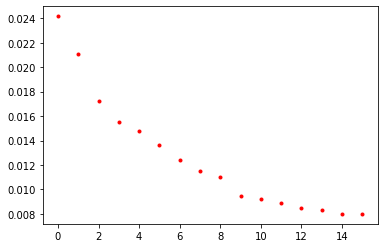

In [5]:
import sys
sys.path.append("..")
import os

import lauetools.LaueTools.IOimagefile as IOimage

import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

def reduce(im, sx, sy, lp, hp):
    SX, SY = im.shape
    im_ = im.reshape(sx, SX // sx, sy,SY // sy).mean(-1).mean(1)
    #ss=cv2.dct(im_)
    ss=fft.dctn(im_)
    ss[:lp, :] = 0.
    ss[:, :lp] = 0.
    ss[hp:, :] = 0.
    ss[:, hp:] = 0.
    #return cv2.idct(ss), ss[lp: hp, lp: hp].ravel()
    return fft.idctn(ss), ss[lp: hp, lp: hp].ravel()

features=np.load('features4096.npy')

features=features.reshape((64*146,4096))

from sklearn.decomposition import PCA

n_pca=16
pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(features)#components_

plt.plot(np.arange(n_pca), pca.explained_variance_ratio_,'r.')


In [26]:
from sklearn.cluster import AffinityPropagation


af = AffinityPropagation(preference=-50).fit(pca_features)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

colors=np.random.uniform(size=(n_clusters_,3))

print(n_clusters_)

print(labels.shape)

labels=labels.reshape((64,146))
im=np.zeros(tuple(list(labels.shape)+[3]))

for i in range(64):
    for j in range(146):
        im[i,j]=colors[labels[i,j]]
            



C:\Users\fengg\anaconda3\lib\site-packages\scikit_learn-0.24.dev0-py3.8-win-amd64.egg\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


487
(9344,)


[[[111 231 206]
  [111 231 206]
  [111 231 206]
  ...
  [  2  58 179]
  [131  99 238]
  [193   9 191]]

 [[111 231 206]
  [111 231 206]
  [111 231 206]
  ...
  [  2  58 179]
  [ 96 126 143]
  [131  99 238]]

 [[111 231 206]
  [111 231 206]
  [111 231 206]
  ...
  [  2  58 179]
  [ 96 126 143]
  [  3 178  83]]

 ...

 [[185 201  77]
  [185 201  77]
  [185 201  77]
  ...
  [234 239 221]
  [  8 158  64]
  [183  86  72]]

 [[185 201  77]
  [185 201  77]
  [185 201  77]
  ...
  [234 239 221]
  [ 92  22  12]
  [111 180 150]]

 [[185 201  77]
  [185 201  77]
  [185 201  77]
  ...
  [234 239 221]
  [ 92  22  12]
  [ 59  95 151]]]


True

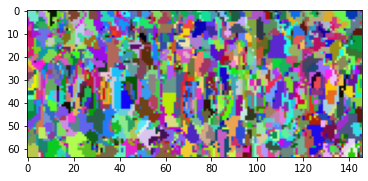

In [34]:
import cv2

img=im.copy()
img=np.rint(img*256).astype(np.uint8)
print(img)
plt.imshow(img)
cv2.imwrite("ddd.tiff", img)

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


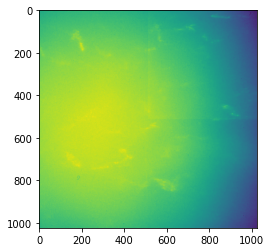

In [35]:
filename="140_S032_C062.TIFF"
dirname="../XRD_images/2nd_saving/"

x=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)
plt.imshow(np.log(x[0]))


CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


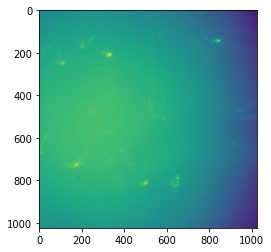

In [36]:
filename="140_S039_C062.TIFF"
dirname="../XRD_images/2nd_saving/"

x=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)
plt.imshow(np.log(x[0]))
